In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models, datasets
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np

In [2]:
(x_train, y_train), (x_test, y_test) = datasets.mnist.load_data()

In [3]:
x_train = x_train.reshape(-1, 28, 28, 1).astype('float32')/255.0
x_test = x_test.reshape(-1, 28, 28, 1).astype('float32')/255.0

In [4]:
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

In [5]:
# model = Sequential()
# model.add(Conv2D(6, kernel_size=5, activation='tanh', input_shape(28,28,1), padding='same')
# model.add(AvgPool2D(pool_size=2, strides=2))
# model.add(Conv2D(16, kernel_size=5, activation='tanh'))
# model.add(AvgPool2D(pool_size=2, strides=2))
# model.add(Flatten())
# model.add(Dense(120, activation='tanh'))
# model.add(Dense(84, activation='tanh'))    
# model.add(Dense(10, activation='softmax'))   

In [8]:
def create_lenet():
    model = models.Sequential([
        layers.Conv2D(6, kernel_size=5, activation='tanh', input_shape=(28,28,1), padding='same'),
        layers.AvgPool2D(pool_size=2, strides=2),
        layers.Conv2D(16, kernel_size=5, activation='tanh'),
        layers.AvgPool2D(pool_size=2, strides=2),
        layers.Flatten(),
        layers.Dense(120, activation='tanh'),
        layers.Dense(84, activation='tanh'),
        layers.Dense(10, activation='softmax')
    ])
    return model

In [9]:
model = create_lenet()

In [10]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)                    │ (None, 28, 28, 6)           │             156 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ average_pooling2d_2                  │ (None, 14, 14, 6)           │               0 │
│ (AveragePooling2D)                   │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 10, 10, 16)          │           2,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ average_pooling2d_3                  │ (None, 5, 5, 16)            │               0 │
│ (AveragePooling2D)                   │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 400)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 120)                 │          48,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 84)                  │          10,164 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 10)                  │             850 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 61,706 (241.04 KB)

 Trainable params: 61,706 (241.04 KB)

 Non-trainable params: 0 (0.00 B)

In [11]:
model.compile(optimizer='adam',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

In [12]:
history = model.fit(x_train, y_train, epochs=5, batch_size=64, validation_split=0.2)

Epoch 1/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.8531 - loss: 0.5314 - val_accuracy: 0.9618 - val_loss: 0.1370
Epoch 2/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.9622 - loss: 0.1238 - val_accuracy: 0.9718 - val_loss: 0.0895
Epoch 3/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.9775 - loss: 0.0755 - val_accuracy: 0.9756 - val_loss: 0.0760
Epoch 4/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.9841 - loss: 0.0516 - val_accuracy: 0.9795 - val_loss: 0.0642
Epoch 5/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.9877 - loss: 0.0398 - val_accuracy: 0.9817 - val_loss: 0.0571


In [13]:
def predict_from_file(model, img_path):
    image = load_img(img_path, color_mode='grayscale', target_size=(28,28))
    image = img_to_array(image).reshape(1,28,28,1).astype('float32') / 255.0
    prediction = model.predict(image)
    return prediction.argmax()

In [18]:
img_path = r'Number-5-handwritten.png'
prediction = predict_from_file(model, img_path)
print(f"The predicted digit is: {prediction}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
The predicted digit is: 7


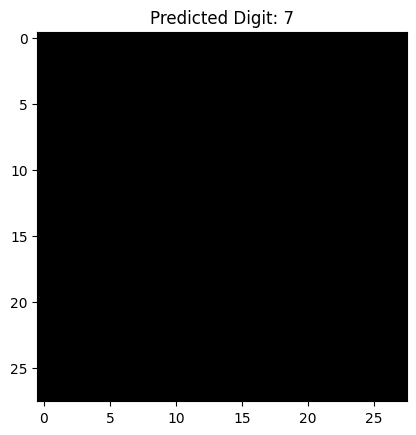

In [20]:
image = load_img(img_path, color_mode='grayscale', target_size=(28, 28))
plt.imshow(image, cmap='gray')
plt.title(f"Predicted Digit: {prediction}")
plt.show()

In [22]:
model.save(r'C:\Users\ACER\OneDrive\Desktop\ML_ProffCourse\Day-08\Number_Classification_NNModel.h5')